# Task 1 - Iris Flowers Classification ML Project


  The goal is to create a Machine Learning model that can learn from the measurements of these irises whose species are already known, so that we can predict the species for the new irises.


# Steps

1. Step 1 - Import libraries
2. Step 2 - Understanding the data
3. Step 3 - Missing values's imputation
4. Step 4 - Data visualization
5. Step 5 - Model building Part A
6. Step 6 - Model building Part B
7. Step 7 - Evaluating the model

# 1. Import Libraries

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sb
import sklearn

In [3]:
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Import dataset from CSV file

In [4]:
iris_data = pd.read_csv('iris.data')


In [5]:
iris_data.head(5)

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [6]:
iris_data.columns

Index(['5.1', '3.5', '1.4', '0.2', 'Iris-setosa'], dtype='object')

In [19]:
columns = ['Sepal_length', 'Sepal_width', 'Petal_length', 'Petal_width', 'Class']

In [20]:
iris_data.columns = columns
iris_data.head()

,Sepal_length,Sepal_width,Petal_length,Petal_width,Class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


# 2. Understanding the data

In [22]:
iris_data.shape

(149, 5)

In [23]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_length  149 non-null    float64
 1   Sepal_width   149 non-null    float64
 2   Petal_length  149 non-null    float64
 3   Petal_width   149 non-null    float64
 4   Class         149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [24]:
iris_data.describe()

,Sepal_length,Sepal_width,Petal_length,Petal_width
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# 3. Missing value's imputation

In [25]:
iris_data.isnull().sum()

Sepal_length    0
Sepal_width     0
Petal_length    0
Petal_width     0
Class           0
dtype: int64

# 4. Data visualization


# Box plot

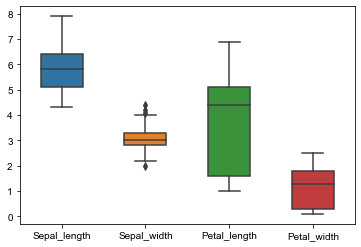

In [26]:
sb.boxplot(data = iris_data, width= 0.5, fliersize = 5)
sb.set(rc = {"figure.figsize" : (6,6)})

# Exploring the correlation between different columns



# Heatmap

Index(['Sepal_length', 'Sepal_width', 'Petal_length', 'Petal_width', 'Class'], dtype='object')

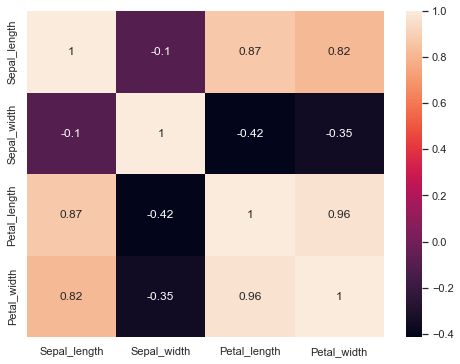

In [28]:
corr = iris_data.corr()
plt.figure(figsize = (8,6))
sb.heatmap(corr, annot=True)
iris_data.columns

From the heatmap we can see the correlation between different features that can affect a iris_data listing. There's correlation among Sepal_length to reviews to Petal_length and Petal_width gives almost the same information.




# Violin plot

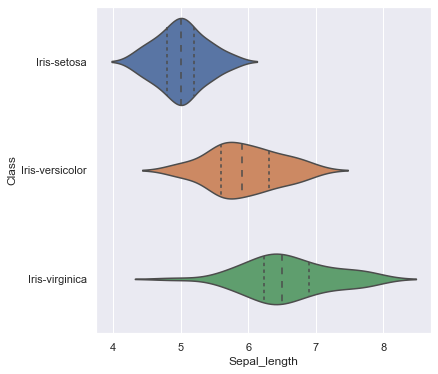

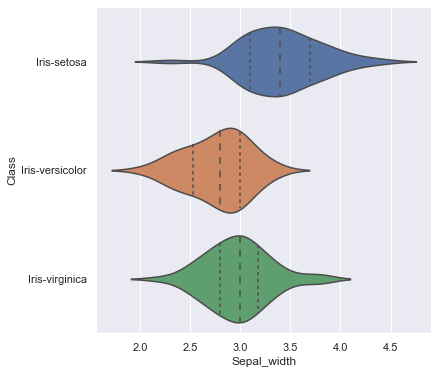

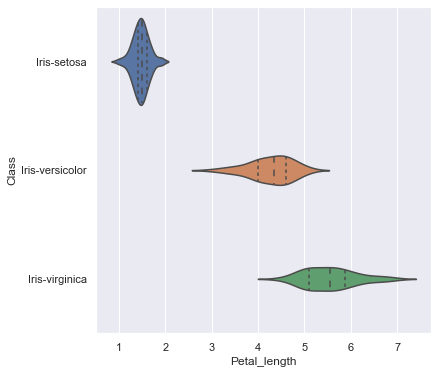

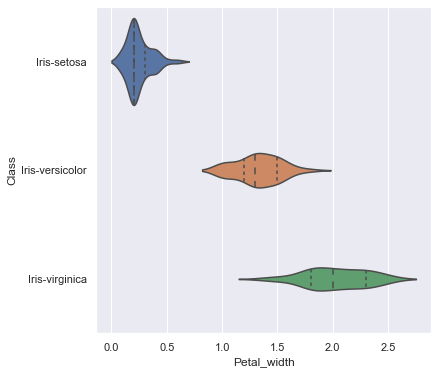

In [29]:
sb.violinplot(y = 'Class', x = 'Sepal_length', data= iris_data, inner = 'quartile')
plt.show()

sb.violinplot(y = 'Class', x = 'Sepal_width', data= iris_data, inner = 'quartile')
plt.show()

sb.violinplot(y = 'Class', x = 'Petal_length', data= iris_data, inner = 'quartile')
plt.show()

sb.violinplot(y = 'Class', x = 'Petal_width', data= iris_data, inner = 'quartile')
plt.show()

The above plotted Violin plot says that iris-Setosa class is having a smaller petal length and peatl width compared to other class

# 5. Model building Part A




# 5.1 x is having all the dependent variables.

## y is having an independent variable.


In [33]:
x = iris_data.drop(['Class'], axis = 1)
y = iris_data['Class']
print(f'x shape: {x.shape} | y shape: {y.shape}')

x shape: (149, 4) | y shape: (149,)


# 5.2 Train Test Split

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.10, random_state = 1)

## 5.3 Model creation

Support Vector Classifier (SVC) is performing better than other algorithms. Let's train SVC model on our training set and predict on test set in next step.

In [35]:
model = []
model.append(('SVC', SVC(gamma = 'auto')))

# 6. Model building Part B

# 6.1 We are defining our SVC model and passing gamma as auto.

# 6.2 After that training the model on x_train and y_train using .fit() method.

# 6.3 Then we are predicting on x_test using .predict() method.

In [36]:
model = SVC(gamma='auto')
model.fit(x_train, y_train)
prediction = model.predict(x_test)

# 6.4 Now checking the accuracy of model

In [37]:
print(f'Test Accuracy: {accuracy_score(y_test, prediction)}')
print(f'Classification report: \n {classification_report(y_test, prediction)}')

Test Accuracy: 0.9333333333333333
Classification report: 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         4
Iris-versicolor       0.90      1.00      0.95         9
 Iris-virginica       1.00      0.50      0.67         2

       accuracy                           0.93        15
      macro avg       0.97      0.83      0.87        15
   weighted avg       0.94      0.93      0.92        15



# Conclusion

For this model, the accuracy on the test set is 0.93, which means the model made the right prediction for 93% of the irises in the given dataset. We can expect the model to be correc 93% of the time for predicting the species of new irises. This is high level of accuracy and it means that our model may be trustworthy enough to use.